In [1]:
%env CUDA_VISIBLE_DEVICES=
import numpy as np
import tensorflow as tf
from keras.layers import *
from keras.models import Sequential

# define batchsize (as placeholder)
batch_size = tf.placeholder_with_default(128, [])

#define generator and discriminator
gen = Sequential([InputLayer([1]), Dense(12, activation = 'elu'), Dense(1, activation = 'sigmoid')])
disc = Sequential([InputLayer([1]), Dense(12, activation = 'elu'), Dense(2, activation = 'sigmoid')])

# define real data - as normal distribution (tf.random_normal), define noise(z) as uniform distribution
noise = tf.random_uniform(shape = [batch_size, 1], minval = 0., maxval = 1.)
real_data = tf.random_normal(shape = [batch_size, 1], mean = 4)

# count gen_data
gen_data = gen(noise)


logit s _on_real_data = disc(real_data)
logits_on_gen_data = disc(gen_data)


IS_REAL = 1
IS_FAKE = 0

disc_loss = -0.5 * tf.reduce_mean(tf.nn.log_softmax(logits_on_real_data[:, IS_REAL]) + 
                           tf.nn.log_softmax(logits_on_gen_data[:, IS_FAKE]))

gen_loss = -tf.reduce_mean(tf.nn.log_softmax(logits_on_gen_data[:, IS_REAL]))


train_disc = tf.train.GradientDescentOptimizer(1e-2).minimize(disc_loss, var_list = disc.trainable_weights)
# learning rate = 1e-2

train_gen = tf.train.GradientDescentOptimizer(1e-3).minimize(gen_loss, var_list = gen.trainable_weights)
# learning rate = 1e-3

env: CUDA_VISIBLE_DEVICES=


Using TensorFlow backend.


In [2]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

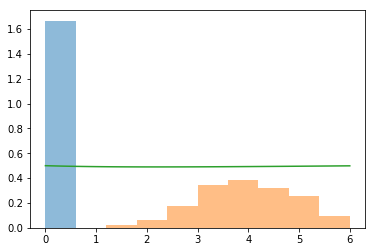

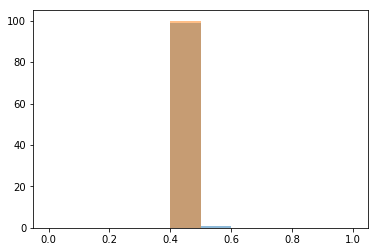

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

for i in range(100000):
    for _ in range(5):
        sess.run(train_disc)
    sess.run(train_gen)
    
    if i % 1000 == 0:
        clear_output(True)
        plt.hist(sess.run(gen_data, {batch_size:1000})[:,0], range=[0, 6], alpha=0.5, normed=True)
        plt.hist(sess.run(real_data, {batch_size:1000})[:,0], range=[0, 6], alpha=0.5, normed=True)
        x = np.linspace(0,6, dtype='float32')
        plt.plot(x, sess.run(tf.nn.softmax(disc(tf.constant(x[:, None]))))[:, IS_REAL])

        plt.show()
        
        plt.hist(sess.run(tf.nn.softmax(logits_on_real_data)[:, IS_REAL], {batch_size:100}),
                 range=[0, 1], alpha=0.5)
        plt.hist(sess.run(tf.nn.softmax(logits_on_gen_data)[:, IS_REAL], {batch_size:100}),
                 range=[0, 1], alpha=0.5)
        plt.show()